In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
#import time library and datetime module from datetime library
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
#create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#add lats and longs to a list
coordinates = list(lat_lngs)
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

8.632067071451914 31.896397013522744
-49.77797282951135 -155.48381341904826
-31.23803345656013 -12.268813083844094
19.904532617275237 75.02581023999153
-32.39872918130843 -64.10221324928503
3.1814376484809657 48.680544916313806
-35.65657141960427 138.1691863914121
-52.92411087033978 177.84410769055603
27.29632163745677 -109.03324501482525
75.9321586590703 -76.15593524096509
-14.157405902620908 -116.98698755550498
78.56398693373333 -108.36600429555257
76.97483516729372 48.54967186401845
64.08670549257005 34.01917323364347
41.525834757733065 73.59844769889565
-62.82320863545391 -47.857449028729064
62.850782254903294 -73.25847362133426
-13.846007581397132 66.26596643972252
-68.95235926406846 -105.5520833053778
79.08337730993259 19.478638648045347
-55.93311958771535 124.85461913520385
-2.8146442957442446 38.75738234393654
-1.469563688051693 55.12671660059769
19.298044285463718 -129.2861262017197
-20.411644960820098 168.18302507547975
-31.357710548653188 171.1396521019375
-72.32844881159842

In [5]:
#create a list for holding cities
cities = []
#identify nearest city for each lat and lng combo.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the city list.
    if city not in cities:
        cities.append(city)
#pring the city count to confirm count.
len(cities)

643

In [6]:
#create an empty list to hold the weather data.
city_data = []
#print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")
#create counters.
record_count = 1 
set_count = 1

    #loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #log the URL, Record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count.
    record_count +=1
#run an API request for each of the cities
    try:
        #parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({'City': city.title(),
                         "lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
#if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
#indicate that the data loading is completed.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | malakal
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | khuldabad
Processing Record 5 of Set 1 | rio tercero
Processing Record 6 of Set 1 | hobyo
Processing Record 7 of Set 1 | victor harbor
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | alamos
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | nadvoitsy
Processing Record 15 of Set 1 | toktogul
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | grand gaube
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | voi
Processing

Processing Record 36 of Set 4 | arlit
Processing Record 37 of Set 4 | harnosand
Processing Record 38 of Set 4 | santiago
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | williston
Processing Record 41 of Set 4 | orbetello
Processing Record 42 of Set 4 | chernushka
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | ulagan
Processing Record 45 of Set 4 | leh
Processing Record 46 of Set 4 | haverfordwest
Processing Record 47 of Set 4 | penarroya-pueblonuevo
Processing Record 48 of Set 4 | bangolo
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | marovoay
Processing Record 2 of Set 5 | nikolskoye
Processing Record 3 of Set 5 | butaritari
Processing Record 4 of Set 5 | ostrovnoy
Processing Record 5 of Set 5 | dese
Processing Record 6 of Set 5 | nishihara
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | carutapera
Processing Record 9 of Set 5 | chikodi
Processing Rec

Processing Record 24 of Set 8 | marcona
City not found. Skipping...
Processing Record 25 of Set 8 | loyabad
City not found. Skipping...
Processing Record 26 of Set 8 | trois-rivieres
Processing Record 27 of Set 8 | mayor pablo lagerenza
Processing Record 28 of Set 8 | margate
Processing Record 29 of Set 8 | ishigaki
Processing Record 30 of Set 8 | daru
Processing Record 31 of Set 8 | frasinet
Processing Record 32 of Set 8 | buchanan
Processing Record 33 of Set 8 | klaksvik
Processing Record 34 of Set 8 | clyde river
Processing Record 35 of Set 8 | lolua
City not found. Skipping...
Processing Record 36 of Set 8 | loding
Processing Record 37 of Set 8 | acapulco
Processing Record 38 of Set 8 | sebastian
Processing Record 39 of Set 8 | iberia
Processing Record 40 of Set 8 | half moon bay
Processing Record 41 of Set 8 | aban
Processing Record 42 of Set 8 | denpasar
Processing Record 43 of Set 8 | camacha
Processing Record 44 of Set 8 | asau
Processing Record 45 of Set 8 | tevriz
Processing 

Processing Record 12 of Set 12 | pareora
Processing Record 13 of Set 12 | felanitx
Processing Record 14 of Set 12 | bonavista
Processing Record 15 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 16 of Set 12 | richards bay
Processing Record 17 of Set 12 | marawi
Processing Record 18 of Set 12 | moree
Processing Record 19 of Set 12 | chiradzulu
Processing Record 20 of Set 12 | davidson
Processing Record 21 of Set 12 | parsons
Processing Record 22 of Set 12 | ganzhou
Processing Record 23 of Set 12 | novyy urengoy
Processing Record 24 of Set 12 | abu kamal
Processing Record 25 of Set 12 | vila franca do campo
Processing Record 26 of Set 12 | demirci
Processing Record 27 of Set 12 | kendari
Processing Record 28 of Set 12 | gouyave
Processing Record 29 of Set 12 | hyeres
Processing Record 30 of Set 12 | dakar
Processing Record 31 of Set 12 | coxim
Processing Record 32 of Set 12 | noumea
Processing Record 33 of Set 12 | yurginskoye
Processing Record 34 of Set 12 | la rioj

In [7]:
len(city_data)

587

In [8]:
#put city data list into a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Malakal,9.5334,31.6605,92.35,12,75,5.01,SS,2022-04-02 19:58:25
1,Mataura,-46.1927,168.8643,47.79,95,68,2.86,NZ,2022-04-02 19:58:26
2,Jamestown,42.0970,-79.2353,49.51,35,100,4.00,US,2022-04-02 19:56:57
3,Khuldabad,20.0500,75.1833,80.67,18,100,7.96,IN,2022-04-02 19:58:26
4,Rio Tercero,-32.1730,-64.1141,74.80,27,0,18.79,AR,2022-04-02 19:58:27
5,Hobyo,5.3505,48.5268,81.70,72,47,12.12,SO,2022-04-02 19:58:27
6,Victor Harbor,-35.5667,138.6167,56.77,83,74,6.42,AU,2022-04-02 19:58:27
7,Dunedin,-45.8742,170.5036,57.79,86,26,5.46,NZ,2022-04-02 19:58:28
8,Alamos,27.0167,-108.9333,88.43,13,4,7.34,MX,2022-04-02 19:57:53
9,Qaanaaq,77.4840,-69.3632,14.11,82,89,4.21,GL,2022-04-02 19:58:28


In [9]:
#change column order of DataFrame
new_column_order = ['City', 'Country', 'Date', 'lat', 'lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Malakal,SS,2022-04-02 19:58:25,9.5334,31.6605,92.35,12,75,5.01
1,Mataura,NZ,2022-04-02 19:58:26,-46.1927,168.8643,47.79,95,68,2.86
2,Jamestown,US,2022-04-02 19:56:57,42.0970,-79.2353,49.51,35,100,4.00
3,Khuldabad,IN,2022-04-02 19:58:26,20.0500,75.1833,80.67,18,100,7.96
4,Rio Tercero,AR,2022-04-02 19:58:27,-32.1730,-64.1141,74.80,27,0,18.79


In [10]:
#create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [11]:
lats = city_data_df["lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
#get todays time in seconds
today = time.strftime("%x")
today

'04/02/22'

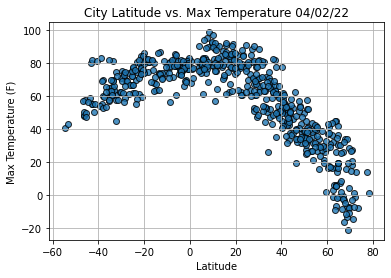

In [13]:
#build scatter plot for lat vs max temp
plt.scatter (lats, max_temps, edgecolor = 'k', linewidths = 1, marker= 'o',
            alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the graph
plt.savefig("weather_data/fig1.png")
#show the plot
plt.show()

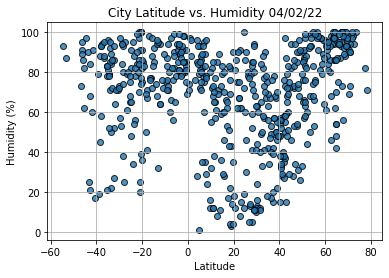

In [14]:
#build scatter plot for lat vs max temp
plt.scatter (lats, humidity, edgecolor = 'k', linewidths = 1, marker= 'o',
            alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Humidity {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the graph
plt.savefig("weather_data/fig2.png")
#show the plot
plt.show()

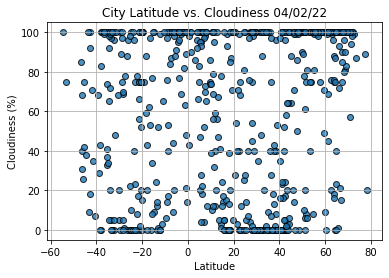

In [15]:
#build scatter plot for lat vs max temp
plt.scatter (lats, cloudiness, edgecolor = 'k', linewidths = 1, marker= 'o',
            alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the graph
plt.savefig("weather_data/fig3.png")
#show the plot
plt.show()

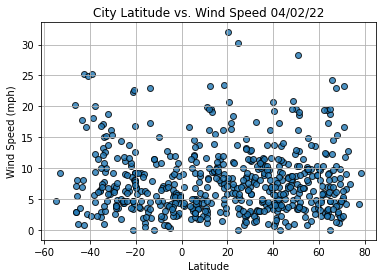

In [16]:
#build scatter plot for lat vs max temp
plt.scatter (lats, wind_speed, edgecolor = 'k', linewidths = 1, marker= 'o',
            alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the graph
plt.savefig("weather_data/fig4.png")
#show the plot
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

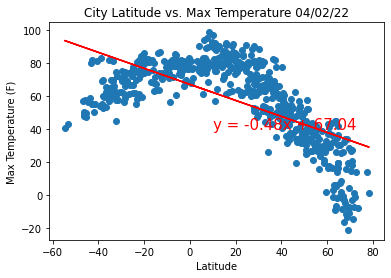

In [18]:
plot_linear_regression(lats, max_temps, f"City Latitude vs. Max Temperature {today}"
                      , "Max Temperature (F)", (10,40))

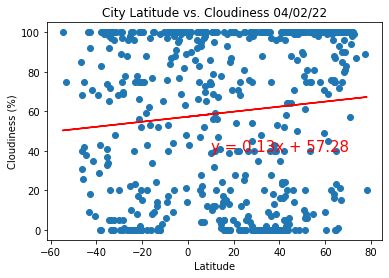

In [19]:
plot_linear_regression(lats, cloudiness, f"City Latitude vs. Cloudiness {today}"
                      , "Cloudiness (%)", (10,40))

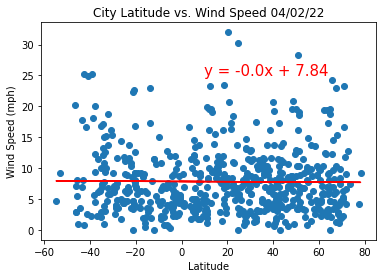

In [20]:
plot_linear_regression(lats, wind_speed, f"City Latitude vs. Wind Speed {today}"
                      , "Wind Speed (mph)", (10,25))

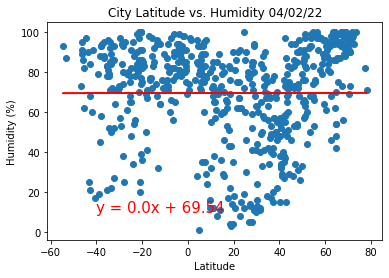

In [21]:
plot_linear_regression(lats, humidity, f"City Latitude vs. Humidity {today}"
                      , "Humidity (%)", (-40,10))

In [22]:
city_data_df.index.name = 'City_ID'
city_data_df.head()

,City,Country,Date,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Malakal,SS,2022-04-02 19:58:25,9.5334,31.6605,92.35,12,75,5.01
1,Mataura,NZ,2022-04-02 19:58:26,-46.1927,168.8643,47.79,95,68,2.86
2,Jamestown,US,2022-04-02 19:56:57,42.0970,-79.2353,49.51,35,100,4.00
3,Khuldabad,IN,2022-04-02 19:58:26,20.0500,75.1833,80.67,18,100,7.96
4,Rio Tercero,AR,2022-04-02 19:58:27,-32.1730,-64.1141,74.80,27,0,18.79


In [23]:
index13 = city_data_df.loc[13]
index13

City                     Toktogul
Country                        KG
Date          2022-04-02 19:58:29
lat                       41.8708
lng                       72.9402
Max Temp                    50.74
Humidity                       58
Cloudiness                      0
Wind Speed                   4.05
Name: 13, dtype: object

In [24]:
city_data_df['lat'] >=0

City_ID
0       True
1      False
2       True
3       True
4      False
       ...  
582    False
583     True
584     True
585     True
586    False
Name: lat, Length: 587, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["lat"] >=0)].head()

,City,Country,Date,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Malakal,SS,2022-04-02 19:58:25,9.5334,31.6605,92.35,12,75,5.01
2,Jamestown,US,2022-04-02 19:56:57,42.0970,-79.2353,49.51,35,100,4.00
3,Khuldabad,IN,2022-04-02 19:58:26,20.0500,75.1833,80.67,18,100,7.96
5,Hobyo,SO,2022-04-02 19:58:27,5.3505,48.5268,81.70,72,47,12.12
8,Alamos,MX,2022-04-02 19:57:53,27.0167,-108.9333,88.43,13,4,7.34


In [26]:
northern_hemi_df = city_data_df.loc[(city_data_df["lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["lat"] < 0)]

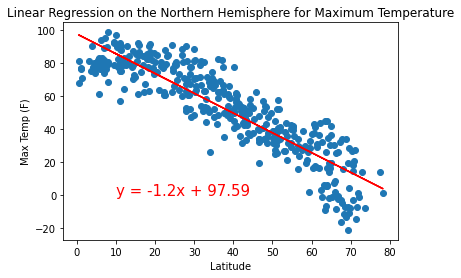

In [27]:
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature",
                       'Max Temp (F)', (10,0))

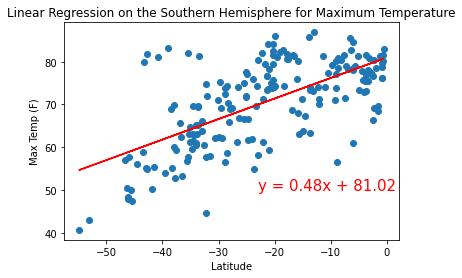

In [28]:
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp (F)", (-23,50))

In [29]:
linregress(southern_hemi_df['lat'],southern_hemi_df['Max Temp'])

LinregressResult(slope=0.48085818669312685, intercept=81.02082749593498, rvalue=0.6506487558280653, pvalue=1.7089439661618996e-24, stderr=0.040714779941257905, intercept_stderr=1.0417555527338973)

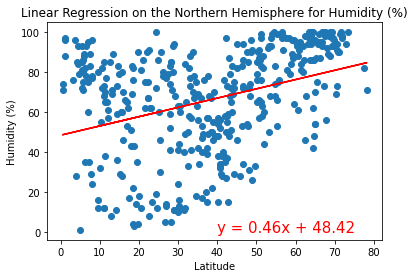

In [30]:
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Humidity (%)",
                       'Humidity (%)', (40,0))

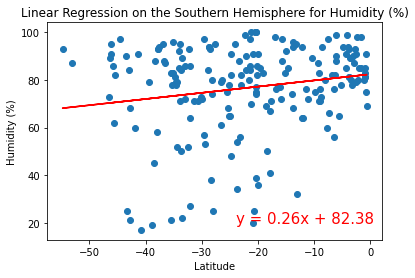

In [31]:
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Humidity (%)",
                       'Humidity (%)', (-24,20))

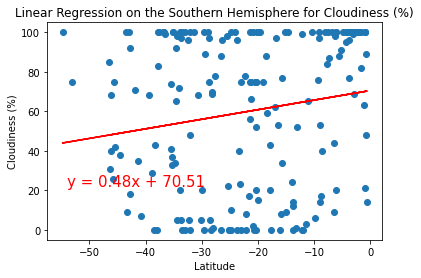

In [32]:
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Cloudiness (%)",
                       'Cloudiness (%)', (-54,22))

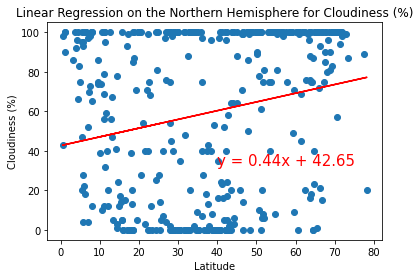

In [33]:
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Cloudiness (%)",
                       'Cloudiness (%)', (40,33))

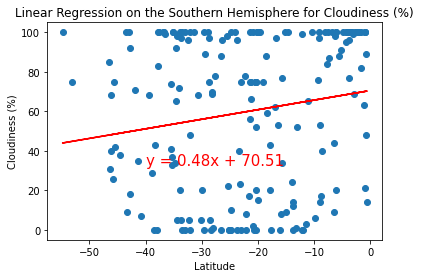

In [34]:
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Cloudiness (%)",
                       'Cloudiness (%)', (-40,33))

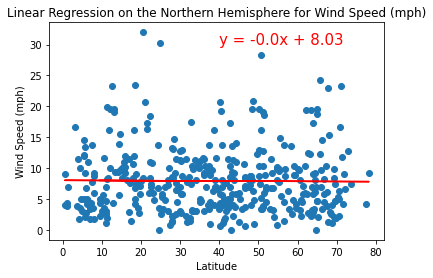

In [35]:
x_values = northern_hemi_df['lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Wind Speed (mph)",
                       'Wind Speed (mph)', (40,30))

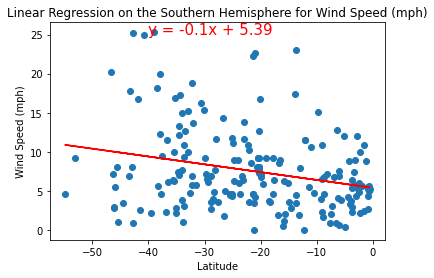

In [36]:
x_values = southern_hemi_df['lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Wind Speed (mph)",
                       'Wind Speed (mph)', (-40,25))